In [20]:
from librosa.feature import melspectrogram
from librosa import stft, mel_frequencies
from librosa.filters import mel
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import gridspec
import matplotlib.pyplot as plt 

n_fft = 128
n_mels = 4
fmax =500
fs = 1000
htk = True
t=0.25
s = 2*np.pi*np.linspace(0,t, int(t*fs))
x0 = np.sin(25*s) + np.sin(75*s) + np.sin(150*s) \
    + np.sin(400*s) + np.sin(450*s)
x1 = np.sin(75*s) + np.sin(450*s)
x2 = np.sin(75*s)
x3 =  np.sin(450*s)
x = np.concatenate((x0,x1,x2,x3))

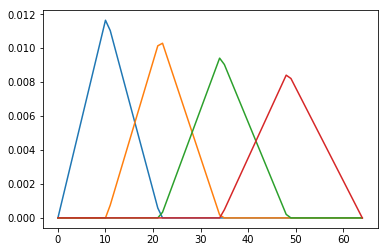

In [21]:
mel_fb = mel(fs, n_fft, n_mels, fmax=fmax, htk=htk)
counter=0
for i in mel_fb:
    plt.plot(i)
    counter+=1
    if counter == 4:
        break

In [22]:
spec = stft(x, n_fft)
mel_spec = melspectrogram(x, sr=fs, n_fft=n_fft, n_mels=n_mels, hop_length=n_fft//4, htk=htk)
mel_frequencies(4+2, fmax=fmax, htk=htk)
mel_fb = mel(fs, n_fft, n_mels, fmax=fmax, htk=htk)

Text(0.5, 0, 'Amp.')

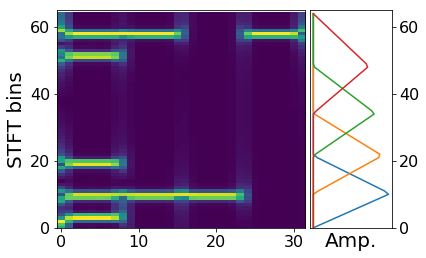

In [23]:
fbins = n_fft//2+1
x_axis = list(range(fbins)) # This is for swapping x and y axis on 2nd graph
fig = plt.figure(figsize=(6, 4)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
gs.update(wspace=0.025)

ax0 = plt.subplot(gs[0])
ax0.imshow(abs(spec), aspect='auto', origin='lower')
ax0.set_ylim(0,fbins)
ax0.tick_params(labelsize=16)
ax0.set_ylabel('STFT bins', size=20)

ax1 = plt.subplot(gs[1])
for i in mel_fb:
    ax1.plot(i,x_axis)
ax1.set_ylim(0,fbins)
# ax1.set_ylabel('STFT bins', size=20)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax1.tick_params(labelsize=16)
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.set_xlabel('Amp.', size=20)


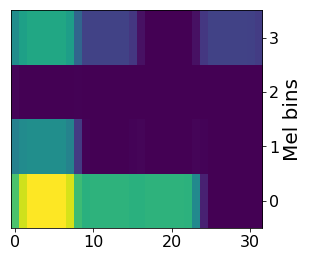

In [24]:
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ax.imshow(mel_spec, aspect='auto', origin='lower')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(labelsize=16)
ax.set_ylabel('Mel bins', size=20)
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()

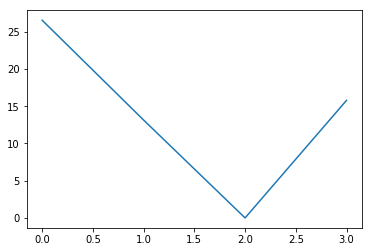

In [25]:
plt.plot(mel_spec[:,2])

# Analyzing Mel

In [26]:
for i in mel_fb:
    print(np.nonzero(i))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21]),)
(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34]),)
(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),)
(array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),)


In [29]:
mel_frequencies(n_mels+2, fmax=fmax, htk=htk)

array([  0.        ,  79.67692502, 168.42301059, 267.27054645,
       377.36932188, 500.        ])